In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="/content/drive/MyDrive/EV_market_segmentation/Datasets/mega_cars.csv"
data = pd.read_csv(url)

In [4]:
data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Drive Type,Price(Lh)
0,Tata Nexon EV,Compact SUV,350 L,30.2,9.9,180,312,96,245,9,FWD,17
1,Tata Tigor EV,Subcompact Sedan,316 L,26.0,5.7,120,306,55,170,9,FWD,14
2,MG ZS EV,Compact SUV,448 L,44.5,8.5,120,340,174,353,8,FWD,25
3,Hyundai Kona Electric,Compact SUV,332 L,39.2,9.7,155,452,103,395,7,FWD,24
4,Jaguar I-Pace,Premium Midsize Sedan,656 L,90.0,4.8,200,470,294,696,13,AWD,112


In [5]:
for i in range(data.shape[0]):
    data.loc[i, 'BootSpace'] = data.loc[i, 'BootSpace'][:-2]

data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Drive Type,Price(Lh)
0,Tata Nexon EV,Compact SUV,350,30.2,9.9,180,312,96,245,9,FWD,17
1,Tata Tigor EV,Subcompact Sedan,316,26.0,5.7,120,306,55,170,9,FWD,14
2,MG ZS EV,Compact SUV,448,44.5,8.5,120,340,174,353,8,FWD,25
3,Hyundai Kona Electric,Compact SUV,332,39.2,9.7,155,452,103,395,7,FWD,24
4,Jaguar I-Pace,Premium Midsize Sedan,656,90.0,4.8,200,470,294,696,13,AWD,112


In [6]:
data['BootSpace'] = data['BootSpace'].astype('int')
data.columns

Index(['Car', 'Style', 'BootSpace', 'Battery Capacity(kWh)',
       'Acceleration Time(sec)', 'TopSpeed(km/h)', 'Range(km)',
       'Max Power(kW)', 'Max Torque(Nm)', 'Charging T(h)', 'Drive Type',
       'Price(Lh)'],
      dtype='object')

In [7]:
data['Style'].value_counts()

Compact SUV              6
Subcompact Sedan         1
Premium Midsize Sedan    1
Premium Coupe            1
Subcompact MPV           1
Premium Fullsize SUV     1
Premium Sports Sedan     1
Hatchback                1
Name: Style, dtype: int64

In [14]:
data.iloc[:, 1:10].head()

,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h)
0,2,350,30.2,9.9,180,312,96,245,9
1,1,316,26.0,5.7,120,306,55,170,9
2,2,448,44.5,8.5,120,340,174,353,8
3,2,332,39.2,9.7,155,452,103,395,7
4,3,656,90.0,4.8,200,470,294,696,13


In [11]:
dt_dummies = pd.get_dummies(data['Drive Type'], prefix = "DT")
data = pd.concat([data, dt_dummies], axis = 1)
data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Drive Type,Price(Lh),DT_AWD,DT_FWD,DT_RWD
0,Tata Nexon EV,2,350,30.2,9.9,180,312,96,245,9,FWD,17,0,1,0
1,Tata Tigor EV,1,316,26.0,5.7,120,306,55,170,9,FWD,14,0,1,0
2,MG ZS EV,2,448,44.5,8.5,120,340,174,353,8,FWD,25,0,1,0
3,Hyundai Kona Electric,2,332,39.2,9.7,155,452,103,395,7,FWD,24,0,1,0
4,Jaguar I-Pace,3,656,90.0,4.8,200,470,294,696,13,AWD,112,1,0,0


In [12]:
data.drop(['Drive Type'], axis = 1, inplace = True)

Text(0.5, 1.0, 'EV Cars Price Comparison')

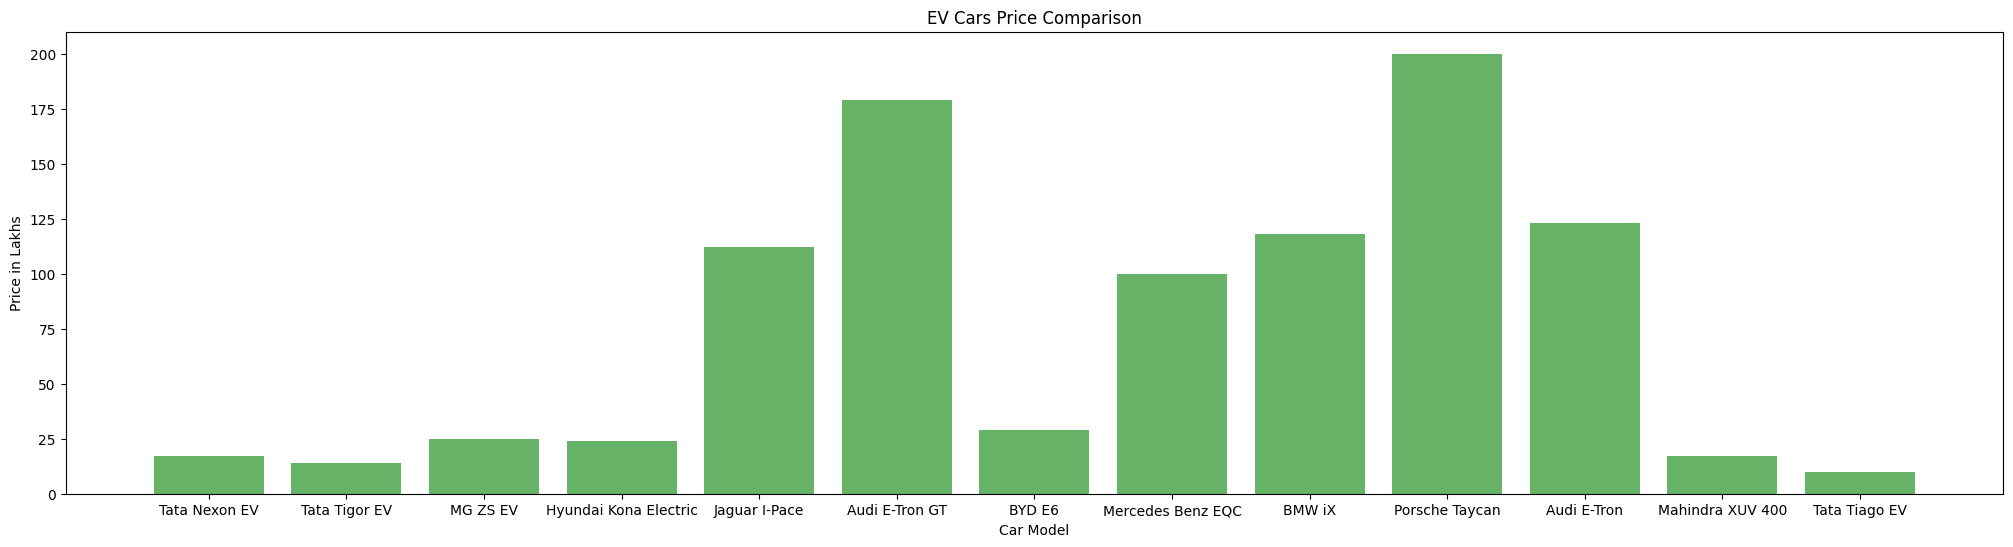

In [16]:
plt.figure(figsize=(25, 6))
plt.bar(data['Car'], data['Price(Lh)'], color = (0, 0.5, 0, 0.6))
plt.xlabel("Car Model")
plt.ylabel("Price in Lakhs")
plt.title("EV Cars Price Comparison")

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
x = data.iloc[:, 1:].values

sc = StandardScaler()
x = sc.fit_transform(x)

pca = PCA()
pca.fit(x)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

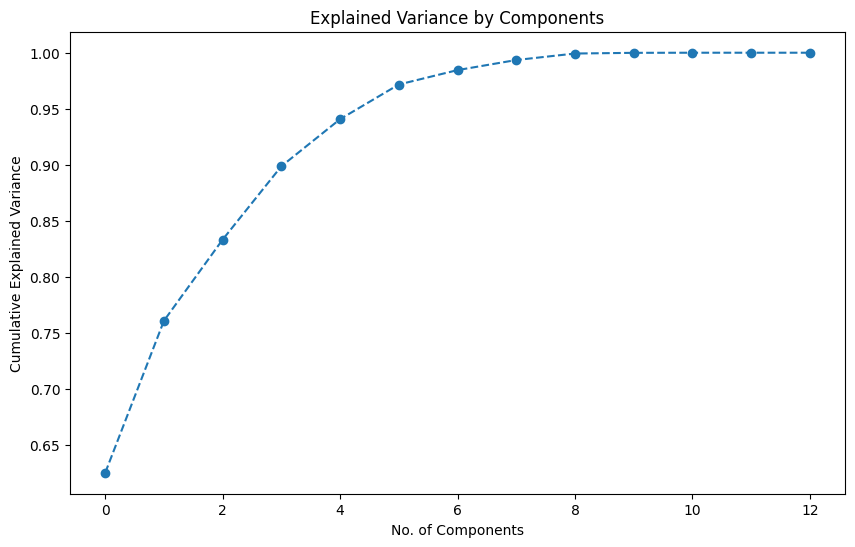

In [19]:
plt.figure(figsize = (10, 6))
plt.plot(range(data.shape[1] - 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')

In [21]:
pca = PCA(n_components = 2)
pca.fit(x)
pca_scores = pca.transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


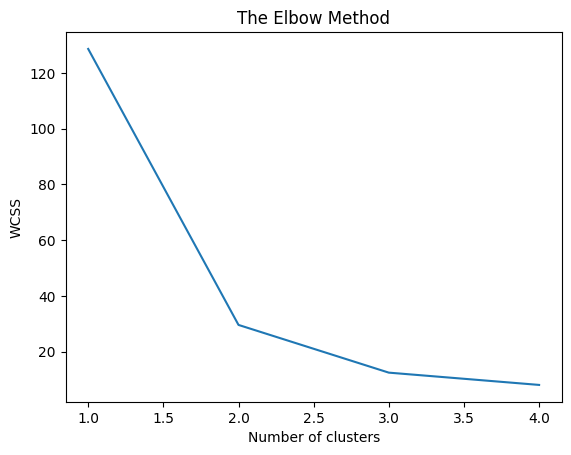

In [22]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(pca_scores)

kmeans2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans2.fit(pca_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

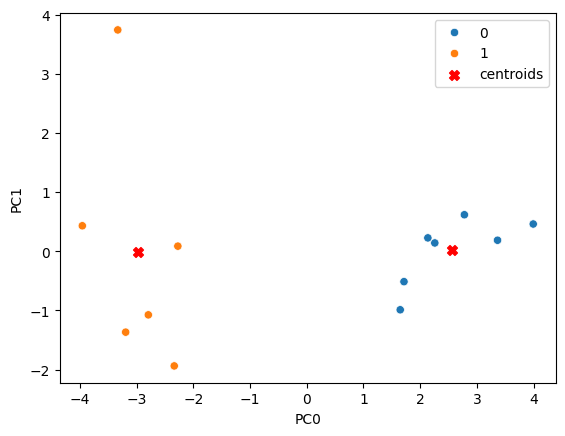

In [26]:
from collections import Counter
Counter(kmeans.labels_)

p_df = pd.DataFrame(data = pca_scores, columns = ['PC' + str(i) for i in range(0, 2) ])

sns.scatterplot(data = p_df, x = "PC0", y = "PC1", hue = kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = "X", c = "r", s = 50, label = "centroids")
plt.legend()
plt.show()

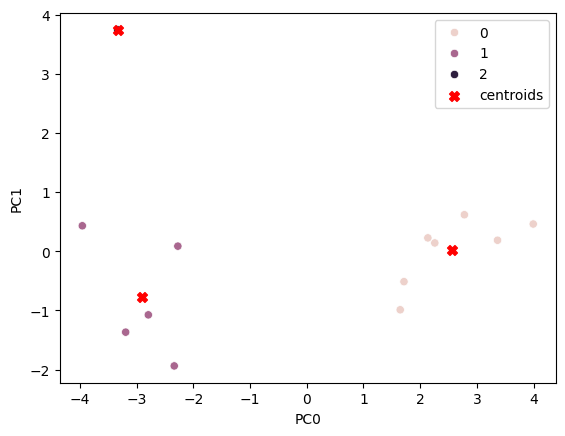

In [27]:
from collections import Counter
Counter(kmeans2.labels_)

p_df = pd.DataFrame(data = pca_scores, columns = ['PC' + str(i) for i in range(0, 2) ])

sns.scatterplot(data = p_df, x = "PC0", y = "PC1", hue = kmeans2.labels_)

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
            marker = "X", c = "r", s = 50, label = "centroids")
plt.legend()
plt.show()

In [30]:
data['Cluster'] = kmeans2.labels_
data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Price(Lh),DT_AWD,DT_FWD,DT_RWD,Cluster
0,Tata Nexon EV,2,350,30.2,9.9,180,312,96,245,9,17,0,1,0,0
1,Tata Tigor EV,1,316,26.0,5.7,120,306,55,170,9,14,0,1,0,0
2,MG ZS EV,2,448,44.5,8.5,120,340,174,353,8,25,0,1,0,0
3,Hyundai Kona Electric,2,332,39.2,9.7,155,452,103,395,7,24,0,1,0,0
4,Jaguar I-Pace,3,656,90.0,4.8,200,470,294,696,13,112,1,0,0,1
